In [1]:
!pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-2yhk6zty
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-2yhk6zty


In [2]:
!wget lalussoft.com/mldemos/vis/saliency.py.zip

--2021-09-02 02:32:54--  http://lalussoft.com/mldemos/vis/saliency.py.zip
Resolving lalussoft.com (lalussoft.com)... 34.198.109.148
Connecting to lalussoft.com (lalussoft.com)|34.198.109.148|:80... connected.
HTTP request sent, awaiting response... 302 Redirect
Location: https://lalussoft.com/mldemos/vis/saliency.py.zip [following]
--2021-09-02 02:32:55--  https://lalussoft.com/mldemos/vis/saliency.py.zip
Connecting to lalussoft.com (lalussoft.com)|34.198.109.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3291 (3.2K) [application/x-zip-compressed]
Saving to: ‘saliency.py.zip.1’

saliency.py.zip.1   100%[===================>]   3.21K  --.-KB/s    in 0s      

2021-09-02 02:32:55 (478 MB/s) - ‘saliency.py.zip.1’ saved [3291/3291]



In [3]:
!wget lalussoft.com/mldemos/vis/tensorflow_backend.py.zip

--2021-09-02 02:32:55--  http://lalussoft.com/mldemos/vis/tensorflow_backend.py.zip
Resolving lalussoft.com (lalussoft.com)... 34.198.109.148
Connecting to lalussoft.com (lalussoft.com)|34.198.109.148|:80... connected.
HTTP request sent, awaiting response... 302 Redirect
Location: https://lalussoft.com/mldemos/vis/tensorflow_backend.py.zip [following]
--2021-09-02 02:32:56--  https://lalussoft.com/mldemos/vis/tensorflow_backend.py.zip
Connecting to lalussoft.com (lalussoft.com)|34.198.109.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [application/x-zip-compressed]
Saving to: ‘tensorflow_backend.py.zip.1’

tensorflow_backend. 100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-09-02 02:32:57 (296 MB/s) - ‘tensorflow_backend.py.zip.1’ saved [1864/1864]



In [4]:
!unzip saliency.py.zip
!unzip tensorflow_backend.py.zip

Archive:  saliency.py.zip
  inflating: saliency.py             
Archive:  tensorflow_backend.py.zip
  inflating: tensorflow_backend.py   


In [5]:
!mv -f saliency.py /usr/local/lib/python3.7/dist-packages/vis/visualization/saliency.py

In [6]:
!mv -f tensorflow_backend.py /usr/local/lib/python3.7/dist-packages/vis/backend/tensorflow_backend.py

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import tensorflow.compat.v1.keras as ke
import matplotlib.pyplot as plt
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
np.random.seed(777)
tf.random.set_random_seed(777)

In [9]:
digitos = ke.datasets.mnist.load_data()

In [10]:
train, test = digitos

In [11]:
xtrain , ytrain = train
xtest, ytest = test

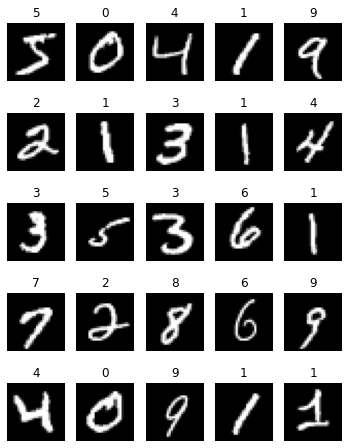

In [12]:
plt.figure(figsize=(6,8))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(xtrain[i],cmap="gray")
  plt.axis("off")
  plt.title(ytrain[i])
plt.show()

y= 1
x=
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 124 253 255 063 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 096 244 251 253 062 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 127 251 251 253 062 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 068 236 251 211 031 008 

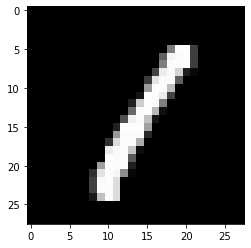

In [13]:
idx=3
print("y=",ytrain[idx])
print("x=")

for i in range(28):
  for j in range(28):
    print("{:03d}".format(xtrain[idx,i,j]), end=" ")
  print("")
plt.imshow(xtrain[idx], cmap="gray")

In [14]:
print("xtrain shape = ", xtrain.shape)
print("xtest shape= ", xtest.shape)
xtrain  = xtrain.reshape([len(xtrain), 28*28])
xtest   = xtest.reshape([len(xtest), 28*28])
print("xtrain shape = ", xtrain.shape)
print("xtest shape= ", xtest.shape)

xtrain shape =  (60000, 28, 28)
xtest shape=  (10000, 28, 28)
xtrain shape =  (60000, 784)
xtest shape=  (10000, 784)


In [15]:
capa_entrada = ke.layers.Input(shape=(784,))
capa_oculta = ke.layers.Dense(64,activation="relu")(capa_entrada)
capa_oculta = ke.layers.Dense(64,activation="relu")(capa_oculta)
capa_salida = ke.layers.Dense(10, activation="softmax")(capa_oculta)

modelo = ke.models.Model(inputs=capa_entrada, outputs=capa_salida)
modelo.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
#pixels de entrada * nodos de primera capa + bias
784*64 + 64

50240

Seleccionar el optimizador 


*   SGD
*   RMSprop
*   Adam
*   Adadelta
*   Adagrad






In [17]:
optimizador = ke.optimizers.RMSprop()

Seleccionar la funcion de perdida


*   Binary crossentropy
*   Categorical Crossentropy
*   Sparse categorical Crossentropy ...




In [18]:
funcion_de_perdida = ke.losses.CategoricalCrossentropy()

In [19]:
print("ytarin shape", ytrain.shape)
print("ytest shape", ytest.shape)

ytrain_ohe = ke.utils.to_categorical(ytrain)
ytest_ohe = ke.utils.to_categorical(ytest)

print("ytarin_ohe shape", ytrain_ohe.shape)
print("ytest_ohe shape", ytest_ohe.shape)

ytarin shape (60000,)
ytest shape (10000,)
ytarin_ohe shape (60000, 10)
ytest_ohe shape (10000, 10)


In [20]:
print("ytrain[0]", ytrain[0])
print("ytrain[1]", ytrain[1])
print("ytrain[2]", ytrain[2])
print("ytrain_ohe[0]", ytrain_ohe[0])

print(ytrain_ohe[1])
print(ytrain_ohe[2])


ytrain[0] 5
ytrain[1] 0
ytrain[2] 4
ytrain_ohe[0] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Seleccional la metrica
- binary accuracy
- accuracy
- AUC: Area under the curve
- Precision
- Recall ...

In [21]:
metrica = ke.metrics.CategoricalAccuracy()

Compilar el modelo

In [22]:
modelo.compile(optimizer=optimizador, loss=funcion_de_perdida, metrics=[metrica])

Entrenar modelo

In [23]:
#el escalamiento es importante para las RNA
log = modelo.fit(xtrain/255.0, ytrain_ohe, batch_size=10000 , epochs=60, validation_data=(xtest/255.0, ytest_ohe))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 1s 11us/sample - loss: 1.9110 - categorical_accuracy: 0.4061 - val_loss: 1.4113 - val_categorical_accuracy: 0.6637
Epoch 2/60
30000/60000 [==============>...............] - ETA: 0s - loss: 1.3246 - categorical_accuracy: 0.7069

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 0s 5us/sample - loss: 1.1940 - categorical_accuracy: 0.7414 - val_loss: 0.9186 - val_categorical_accuracy: 0.8056
Epoch 3/60
60000/60000 [==============================] - 0s 5us/sample - loss: 0.8485 - categorical_accuracy: 0.8086 - val_loss: 0.7099 - val_categorical_accuracy: 0.8316
Epoch 4/60
60000/60000 [==============================] - 0s 5us/sample - loss: 0.6745 - categorical_accuracy: 0.8385 - val_loss: 0.5728 - val_categorical_accuracy: 0.8670
Epoch 5/60
60000/60000 [==============================] - 0s 5us/sample - loss: 0.5624 - categorical_accuracy: 0.8622 - val_loss: 0.4871 - val_categorical_accuracy: 0.8835
Epoch 6/60
60000/60000 [==============================] - 0s 5us/sample - loss: 0.4921 - categorical_accuracy: 0.8743 - val_loss: 0.4572 - val_categorical_accuracy: 0.8822
Epoch 7/60
60000/60000 [==============================] - 0s 5us/sample - loss: 0.4510 - categorical_accuracy: 0.8816 - val_loss: 0.4047 - val_categori

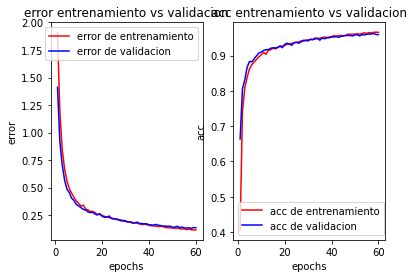

error: 0.14 exactitud: 95.96%


In [24]:
def MostrarResultados(modelo,log):
  plt.subplot(1,2,1)
  error = log.history["loss"]
  val_error = log.history["val_loss"]
  epochs = range(1, len(error)+1)
  plt.plot(epochs, error, color="red", label="error de entrenamiento")
  plt.plot(epochs, val_error, color="blue", label="error de validacion")
  plt.title("error entrenamiento vs validacion")
  plt.xlabel("epochs")
  plt.ylabel("error")
  plt.legend()


  plt.subplot(1,2,2)
  acc=log.history["categorical_accuracy"]
  val_acc = log.history["val_categorical_accuracy"]
  epochs = range(1, len(error)+1)
  plt.plot(epochs, acc, color="red", label="acc de entrenamiento")
  plt.plot(epochs, val_acc, color="blue", label="acc de validacion")
  plt.title("acc entrenamiento vs validacion")
  plt.xlabel("epochs")
  plt.ylabel("acc")
  plt.legend()

  plt.show()
  r = modelo.evaluate(xtest/255, ytest_ohe)
  print("error: {:.2f} exactitud: {:.2%}".format(r[0],r[1]))

MostrarResultados(modelo,log)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


['0: 0.0923%',
 '1: 0.0040%',
 '2: 0.0766%',
 '3: 0.0107%',
 '4: 0.0025%',
 '5: 0.0060%',
 '6: 99.7283%',
 '7: 0.0171%',
 '8: 0.0622%',
 '9: 0.0004%']

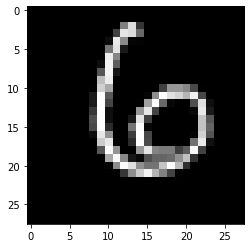

In [25]:
muestra = xtest[100]
plt.imshow(muestra.reshape(28,28), cmap="gray")
prediccion = modelo.predict(muestra[None,:]/255.0)
["{}: {:.4%}".format(n,v) for n,v in enumerate(prediccion[0])]


0.00% 0.00% 0.02% 0.76% 0.00% 0.01% 0.00% 99.19% 0.01% 0.02% 
0.00% 0.10% 99.09% 0.81% 0.00% 0.00% 0.00% 0.00% 0.00% 0.00% 
0.00% 99.44% 0.11% 0.10% 0.04% 0.04% 0.02% 0.19% 0.05% 0.01% 
99.95% 0.00% 0.02% 0.00% 0.00% 0.00% 0.03% 0.00% 0.00% 0.00% 
0.04% 0.00% 0.03% 0.01% 96.00% 0.01% 0.02% 0.04% 0.07% 3.78% 
0.00% 99.53% 0.02% 0.06% 0.01% 0.00% 0.00% 0.34% 0.01% 0.01% 
0.00% 0.00% 0.00% 0.02% 99.35% 0.01% 0.00% 0.01% 0.12% 0.48% 
0.00% 0.08% 0.02% 0.39% 1.19% 0.07% 0.00% 0.06% 0.24% 97.96% 
0.56% 0.00% 0.42% 0.04% 0.41% 9.33% 88.29% 0.00% 0.77% 0.16% 
0.00% 0.00% 0.00% 0.00% 0.70% 0.00% 0.00% 0.19% 0.01% 99.09% 


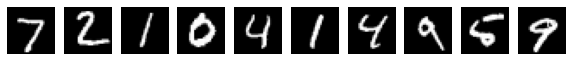

In [26]:
prediccion = modelo.predict(xtest[:10,:]/255.0)
plt.figure(figsize=(10,3))

for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(xtest[i].reshape(28,28),cmap="gray")
  plt.axis("off")

for i in range(len(prediccion)):
  for j in range(10):
    print("{:.2%}".format(prediccion[i,j]), end=" ")
  print("")

(784, 64)


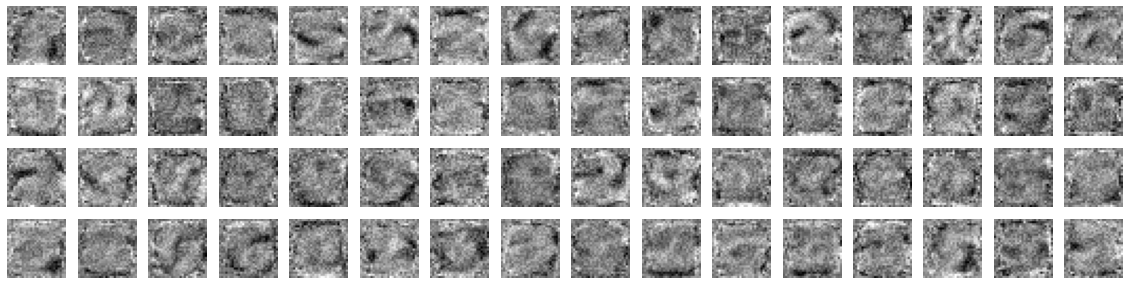

In [27]:
(pesos1,bias) = modelo.layers[1].get_weights()
print(pesos1.shape)
plt.figure(figsize=(20,5))

for i in range(64):
  plt.subplot(4,16,i+1)
  plt.axis("off")
  plt.imshow(pesos1[:,i].reshape(28,28), cmap="gray") #pesos[764pixeles, nodo]

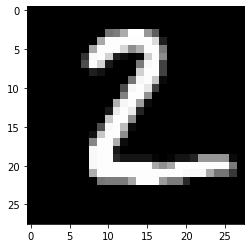

In [28]:
x = xtest[1]

plt.imshow(x.reshape(28,28),cmap="gray")

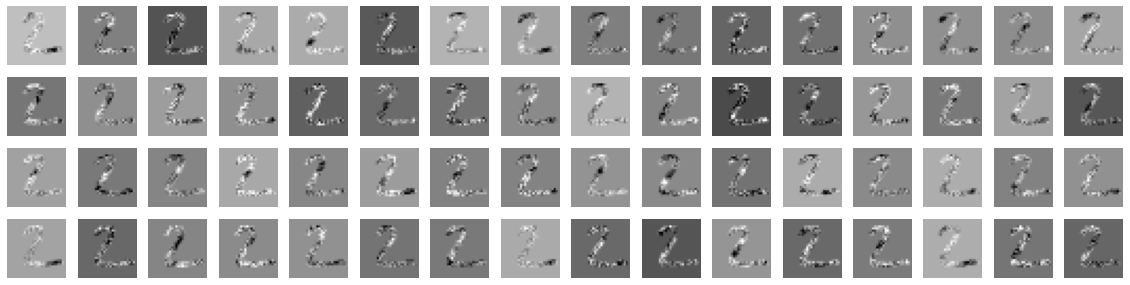

In [29]:
plt.figure(figsize=(20,5))
for i in range(64):
  plt.subplot(4,16,i+1)
  plt.axis("off")
  xx= pesos1[:,i]*x
  plt.imshow(xx.reshape(28,28),cmap="gray")

Red convolucional

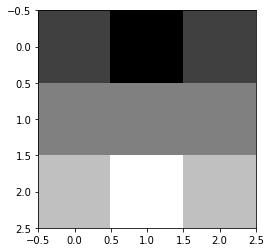

In [30]:
filtro = [
          [-1, -2, -1],
          [0 ,  0,  0],
          [+1, +2, +1]
]
plt.imshow(filtro,cmap="gray")

In [31]:
(xtrain,_), (xtest,_) = digitos

Formatear la imagen para agregar el unico canal

In [32]:
print("xtrain forma inicial: ", xtrain.shape)
print("xtest forma inicial: ", xtest.shape)

xtrain = xtrain[:,:,:,None]
xtest = xtest[...,None]

print("xtrain forma final: ", xtrain.shape)
print("xtest forma final: ", xtest.shape)

xtrain forma inicial:  (60000, 28, 28)
xtest forma inicial:  (10000, 28, 28)
xtrain forma final:  (60000, 28, 28, 1)
xtest forma final:  (10000, 28, 28, 1)


In [33]:
capa_entrada = ke.layers.Input(shape=(28,28,1))
capa_oculta = ke.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same")(capa_entrada)
capa_oculta = ke.layers.Activation("relu")(capa_oculta)
capa_oculta = ke.layers.Dropout(0.30)(capa_oculta)
capa_oculta = ke.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same")(capa_oculta)
capa_oculta = ke.layers.Activation("relu")(capa_oculta)
capa_oculta = ke.layers.Dropout(0.20)(capa_oculta)
capa_oculta = ke.layers.Flatten()(capa_oculta)
capa_salida = ke.layers.Dense(10,activation="softmax")(capa_oculta)

modelo = ke.models.Model(inputs = [capa_entrada], outputs=[capa_salida])

modelo.compile(loss = funcion_de_perdida, optimizer=optimizador, metrics=[metrica])

modelo.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0   

In [34]:
#kernels * tamaño del kernel + bias
64* (3*3) + 64

640

In [35]:
28*28*64

50176

In [36]:
50176*10+10

501770

In [37]:
log = modelo.fit(xtrain/255.0, ytrain_ohe, batch_size=1000 , epochs=5, validation_data=(xtest/255.0, ytest_ohe))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - ETA: 0s - loss: 0.4928 - categorical_accuracy: 0.8532

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 15s 246us/sample - loss: 0.4928 - categorical_accuracy: 0.8532 - val_loss: 0.2069 - val_categorical_accuracy: 0.9402
Epoch 2/5
60000/60000 [==============================] - 11s 186us/sample - loss: 0.1225 - categorical_accuracy: 0.9638 - val_loss: 0.0691 - val_categorical_accuracy: 0.9786
Epoch 3/5
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0745 - categorical_accuracy: 0.9779 - val_loss: 0.0692 - val_categorical_accuracy: 0.9778
Epoch 4/5
60000/60000 [==============================] - 11s 186us/sample - loss: 0.0547 - categorical_accuracy: 0.9835 - val_loss: 0.0560 - val_categorical_accuracy: 0.9820
Epoch 5/5
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0435 - categorical_accuracy: 0.9869 - val_loss: 0.0445 - val_categorical_accuracy: 0.9851


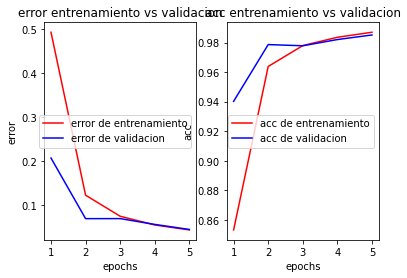

error: 0.04 exactitud: 98.51%


In [38]:
MostrarResultados(modelo,log)

In [39]:
modelo.layers

(3, 3, 1, 64)


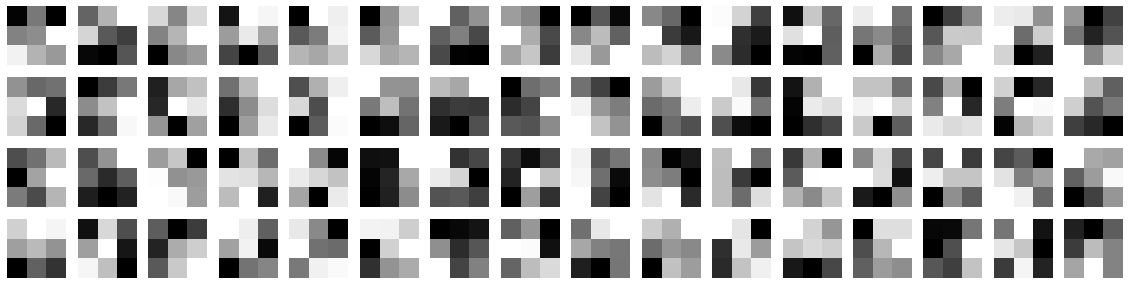

In [40]:
(pesos1,bias) = modelo.layers[1].get_weights()
print(pesos1.shape)
plt.figure(figsize=(20,5))

for i in range(64):
  plt.subplot(4,16,i+1)
  plt.axis("off")
  plt.imshow(pesos1[:,:,0,i], cmap="gray")

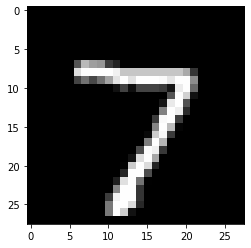

In [43]:
x = xtest[0]
plt.imshow(x[...,0],cmap="gray")

In [47]:
modelo_tmp = ke.models.Model(inputs = modelo.inputs, outputs=modelo.layers[1].output)

In [48]:
actmap = modelo_tmp.predict(x[None,...])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


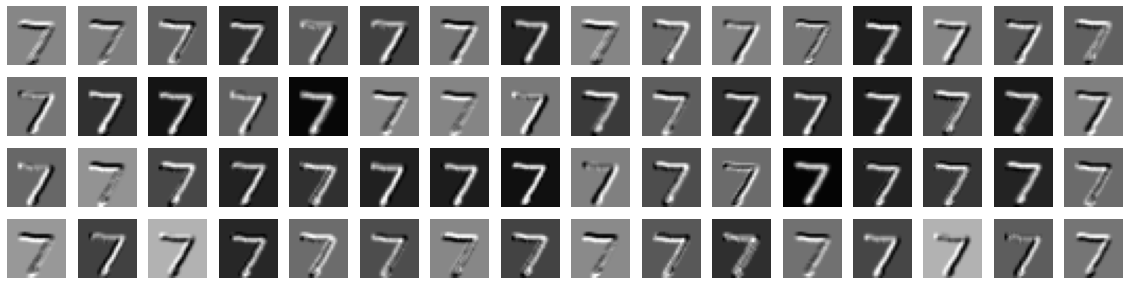

In [49]:
plt.figure(figsize=(20,5))

for i in range(64):
  plt.subplot(4,16,i+1)
  plt.axis("off")
  plt.imshow(actmap[0,:,:,i],cmap="gray")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


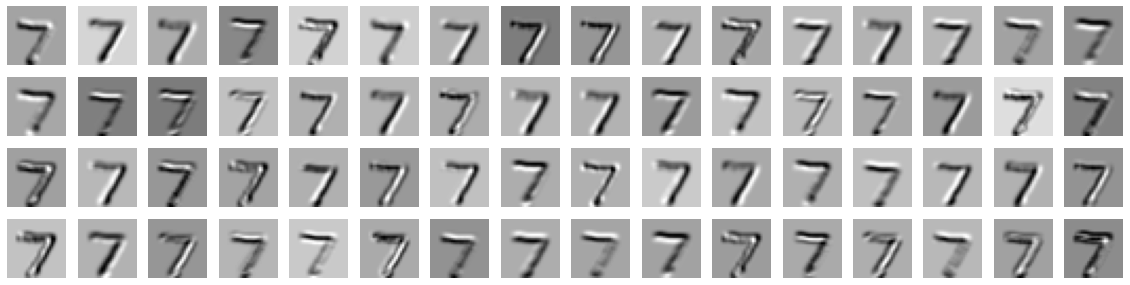

In [50]:
modelo_tmp = ke.models.Model(inputs = modelo.inputs, outputs=modelo.layers[4].output)
actmap = modelo_tmp.predict(x[None,...])

plt.figure(figsize=(20,5))

for i in range(64):
  plt.subplot(4,16,i+1)
  plt.axis("off")
  plt.imshow(actmap[0,:,:,i],cmap="gray")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


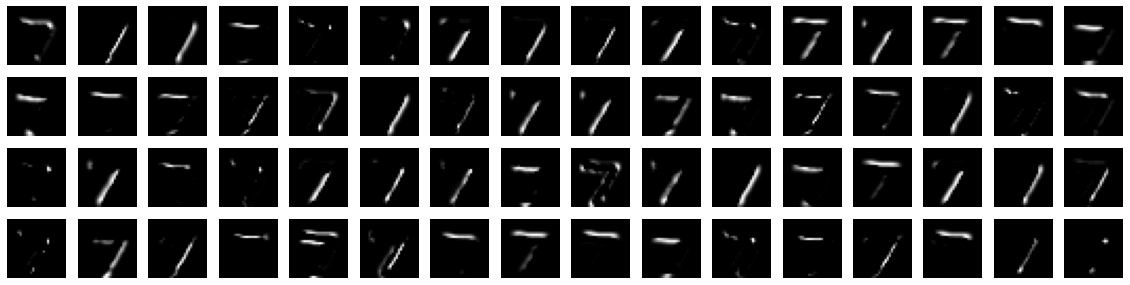

In [51]:
#despues de la activacion
modelo_tmp = ke.models.Model(inputs = modelo.inputs, outputs=modelo.layers[5].output)
actmap = modelo_tmp.predict(x[None,...])

plt.figure(figsize=(20,5))

for i in range(64):
  plt.subplot(4,16,i+1)
  plt.axis("off")
  plt.imshow(actmap[0,:,:,i],cmap="gray")

In [52]:
from vis.visualization import visualize_activation as visac
from vis.visualization import visualize_saliency
from vis.utils import utils as visutils

In [53]:
#cambiamos la ultima capa de la red
modelo.layers[-1].activation = ke.activations.linear

modelo = visutils.apply_modifications(modelo)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


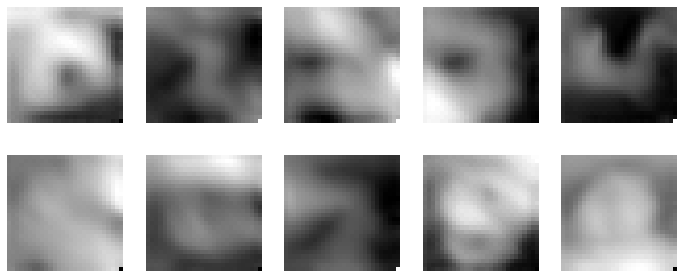

In [54]:
plt.figure(figsize=(12,5))
for idx_filtro in range(10):
  img = visac(modelo,-1,idx_filtro)
  plt.subplot(2,5,idx_filtro+1)
  plt.imshow(img[...,0],cmap="gray")
  plt.axis("off")

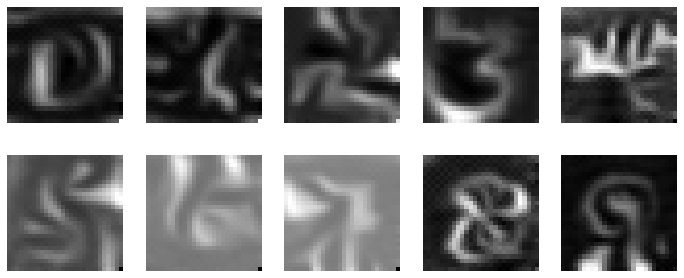

In [55]:
plt.figure(figsize=(12,5))
for idx_filtro in range(10):
  img = visac(modelo,-1,idx_filtro, input_range=(0.0,1.0))
  plt.subplot(2,5,idx_filtro+1)
  plt.imshow(img[...,0],cmap="gray")
  plt.axis("off")

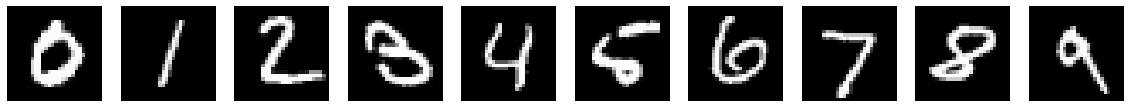

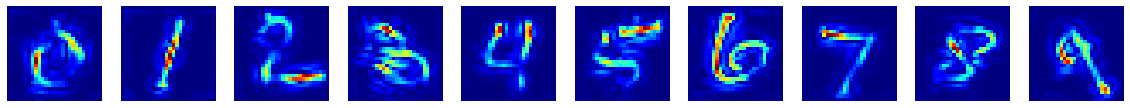

In [58]:
plt.figure(figsize=(20,10))

for clase_idx in range(10):
  idx = np.argmax(ytest==clase_idx) #la comparacion da un vector de T,F donde coincide con la clase
                                    #argmax devuelve el primer true
  plt.subplot(1,10,clase_idx+1)
  plt.imshow(xtest[idx,...,0],cmap="gray")
  plt.axis("off")

plt.figure(figsize=(20,10))
for clase_idx in range(10):
  idx = np.argmax(ytest==clase_idx) 
  img = visualize_saliency(modelo,-1,clase_idx, seed_input=xtest[idx], backprop_modifier="guided")
  plt.subplot(1,10,clase_idx+1)
  plt.imshow(img)
  plt.axis("off")
  